<a href="https://colab.research.google.com/github/Rajesh231/Ml/blob/master/BotnetDetection_CNNfinal_with_Confusionmatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Botnet Detection using CTU-13 dataset


In [3]:
pip install tensorflow.gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 501kB 36.4MB/s 
     |████████████████████████████████| 4.3MB 41.5MB/s 


In [0]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from keras.callbacks import EarlyStopping


In [3]:
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
print(tf.__version__)

2.2.0-rc4


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import variance_threshold

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.variance_threshold module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#from google.colab import files 
#uploaded = files.upload()

In [7]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/finalpreprocessed2.csv")
df.head()

,Dur,Proto,Sport,Dport,State,TotPkts,TotBytes,SrcBytes,Label
0,0.055572,1,13485,1,CON,2,128,60,0
1,0.097566,1,35155,10,CON,2,474,145,0
2,0.000000,1,35155,21,INT,1,145,145,0
3,3598.238525,1,43565,23,CON,876,96819,47731,0
4,3591.619629,1,43565,23,CON,867,95866,47068,0


In [8]:



df.shape

(1038261, 9)

In [9]:
X = df.drop(labels =['Label','State'],axis =1)
X.shape

(1038261, 7)

In [0]:
y = df['Label']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0, stratify =y)

In [12]:
X_train.shape

(830608, 7)

In [13]:
X_test.shape

(207653, 7)

In [14]:

from sklearn.feature_selection import VarianceThreshold
filter = VarianceThreshold(0.01)
X_train = filter.fit_transform(X_train)
X_test = filter.transform(X_test)
X_train.shape, X_test.shape

((830608, 7), (207653, 7))

In [0]:
#X_train_T = X_train.T
#X_test_T = X_test.T

In [0]:
#X_train_T = pd.DataFrame(X_train_T)
#X_test_T = pd.DataFrame(X_test_T)
#X_test_T.shape

In [0]:
#X_train_T.duplicated().sum()

In [0]:



#duplicated_features = X_train_T.duplicated()
#duplicated_features

In [0]:
#features_to_keep = [not index for index in duplicated_features]
#features_to_keep

In [0]:
#X_train = X_train_T[features_to_keep].T
#X_train.shape

In [0]:
#X_test = X_test_T[features_to_keep].T
#X_test.shape

In [22]:
X_train.shape

(830608, 7)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train

array([[ 1.32183022e+00, -4.10682002e-01,  1.21757026e-01, ...,
        -5.94007613e-03, -5.25711261e-03, -2.22797778e-03],
       [-4.36049922e-01,  1.76424631e+00,  1.05061137e+00, ...,
        -4.67969135e-03, -5.04774498e-03, -2.01168354e-03],
       [ 1.36370248e+00, -4.10682002e-01, -6.23215051e-01, ...,
        -5.51994787e-03, -5.25931648e-03, -2.20572529e-03],
       ...,
       [-4.50335745e-01,  1.76424631e+00, -1.70264449e+00, ...,
         5.82351518e-03,  5.68490042e-03, -1.88113557e-03],
       [-4.50444677e-01, -4.10682002e-01, -1.78609203e+00, ...,
        -6.36020439e-03, -5.30479633e-03, -2.25260388e-03],
       [ 1.90868320e+00, -4.10682002e-01,  1.27503703e+00, ...,
        -5.09981961e-03, -5.14892264e-03, -2.06241923e-03]])

In [25]:
X_test

array([[-0.45049884, -0.410682  ,  0.77599401, ..., -0.0063602 ,
        -0.00524549, -0.00225409],
       [-0.45049905, -0.410682  ,  1.01827929, ..., -0.0063602 ,
        -0.00530119, -0.0022526 ],
       [-0.45049862, -0.410682  ,  1.3358008 , ..., -0.0063602 ,
        -0.00526272, -0.0022526 ],
       ...,
       [ 0.89467327, -0.410682  , -0.57774486, ..., -0.00594008,
        -0.00528817, -0.00223065],
       [-0.45049838, -0.410682  ,  1.1983125 , ..., -0.0063602 ,
        -0.00531501, -0.0022526 ],
       [ 0.35424977, -0.410682  , -0.08850411, ..., -0.0063602 ,
        -0.00528476, -0.00219   ]])

In [26]:
X_test.shape,X_train.shape

((207653, 7), (830608, 7))

In [0]:
X_train = X_train.reshape(830608,7,1)
X_test = X_test.reshape(207653,7,1)

In [28]:
X_test.shape,X_train.shape

((207653, 7, 1), (830608, 7, 1))

In [0]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [0]:

#Building CNN model

In [0]:
from tensorflow.keras.layers import MaxPool1D
model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size =2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv1D(64,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv1D(128,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation = 'sigmoid'))
#model.add(EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='min', baseline=None, restore_best_weights=True))


In [83]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 5, 128)            512       
_________________________________________________________________
batch_normalization_15 (Batc (None, 5, 128)            512       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2, 128)            0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)             

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
from tensorflow.keras.optimizers import Adam
#model.compile(optimizer=SGD(lr=0.000005),loss ="binary_crossentropy",metrics = ['f1_score'])
model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy',f1_m,recall_m,precision_m])

# fit the model
#history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

In [85]:
history = model.fit(X_train,y_train,epochs = 21,validation_data = (X_test,y_test),verbose =1)

Epoch 1/21
25957/25957 [==============================] - 80s 3ms/step - loss: 0.0566 - accuracy: 0.9810 - f1_m: 0.3743 - recall_m: 0.3828 - precision_m: 0.3893 - val_loss: 0.0284 - val_accuracy: 0.9914 - val_f1_m: 0.4530 - val_recall_m: 0.4553 - val_precision_m: 0.4667
Epoch 2/21
25957/25957 [==============================] - 91s 4ms/step - loss: 0.0297 - accuracy: 0.9912 - f1_m: 0.4450 - recall_m: 0.4449 - precision_m: 0.4616 - val_loss: 0.0275 - val_accuracy: 0.9915 - val_f1_m: 0.4534 - val_recall_m: 0.4553 - val_precision_m: 0.4673
Epoch 3/21
25957/25957 [==============================] - 96s 4ms/step - loss: 0.0277 - accuracy: 0.9917 - f1_m: 0.4526 - recall_m: 0.4526 - precision_m: 0.4684 - val_loss: 0.0272 - val_accuracy: 0.9916 - val_f1_m: 0.4537 - val_recall_m: 0.4553 - val_precision_m: 0.4678
Epoch 4/21
25957/25957 [==============================] - 87s 3ms/step - loss: 0.0266 - accuracy: 0.9918 - f1_m: 0.4531 - recall_m: 0.4525 - precision_m: 0.4691 - val_loss: 0.0271 - val_a

In [0]:
 y_predict = model.predict(X_test)

In [87]:
y_predict

array([[1.1018645e-08],
       [2.4454513e-08],
       [1.4019729e-07],
       ...,
       [6.5303550e-07],
       [6.5741639e-09],
       [1.4557351e-06]], dtype=float32)

In [88]:
history.history

{'accuracy': [0.981035590171814,
  0.9912148714065552,
  0.9916868209838867,
  0.991809606552124,
  0.9919143319129944,
  0.9919577240943909,
  0.9920335412025452,
  0.992085337638855,
  0.9921286702156067,
  0.992204487323761,
  0.9922658801078796,
  0.9922972321510315,
  0.992347776889801,
  0.9924067854881287,
  0.9924513101577759,
  0.9925307631492615,
  0.9925717115402222,
  0.9926415085792542,
  0.9927005171775818,
  0.9927583336830139,
  0.9928209185600281],
 'f1_m': [0.3742840886116028,
  0.44500046968460083,
  0.452640175819397,
  0.4531194269657135,
  0.4540982246398926,
  0.4517815411090851,
  0.4536549150943756,
  0.45514655113220215,
  0.45569130778312683,
  0.45344114303588867,
  0.455118864774704,
  0.4555641710758209,
  0.4551796317100525,
  0.4567630887031555,
  0.4556815028190613,
  0.45694392919540405,
  0.4587668478488922,
  0.45704084634780884,
  0.4536692500114441,
  0.4584518373012543,
  0.4573681056499481],
 'loss': [0.05655280873179436,
  0.029662596061825752,


In [89]:
print(history.history['accuracy'])

[0.981035590171814, 0.9912148714065552, 0.9916868209838867, 0.991809606552124, 0.9919143319129944, 0.9919577240943909, 0.9920335412025452, 0.992085337638855, 0.9921286702156067, 0.992204487323761, 0.9922658801078796, 0.9922972321510315, 0.992347776889801, 0.9924067854881287, 0.9924513101577759, 0.9925307631492615, 0.9925717115402222, 0.9926415085792542, 0.9927005171775818, 0.9927583336830139, 0.9928209185600281]


In [0]:
def plot_learningCurve(history,epoch):
  #ploting training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

#plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

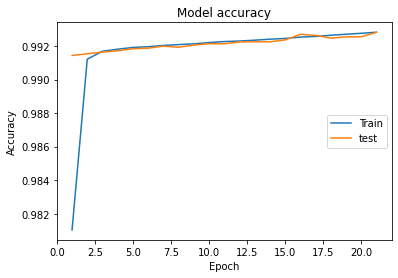

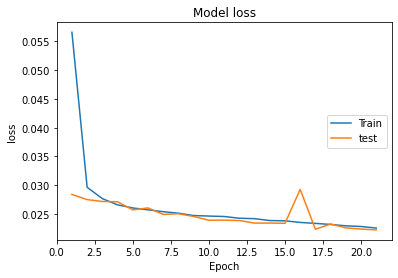

In [91]:
plot_learningCurve(history,21)

**By looking at the above learning curves we can say that our model is neither underfitting nor overfitting as the curves for both training and testing data are nearly same. If model was underfitting then these two curves would have huge variation and if model was overfitting then these two curves would have overlap each other.**

In [0]:
y_predict = np.asarray(y_predict)

In [93]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[201820,    441],
       [  1051,   4341]])

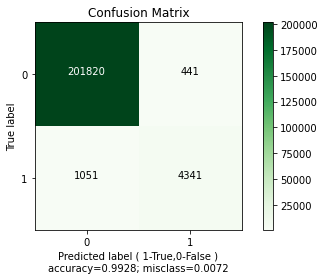

In [94]:

#Plotting Confusion matrix
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = max(history.history['accuracy'])
misclass =1-max(history.history['accuracy'])
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="white" if conff[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

In [0]:
TP = true_positives = 4341
TN = true_negatives = 201820
FP = false_positives = 1051
FN = false_negatives = 441

In [96]:
results={}
metric = "Accuracy"
results[metric]=(TP+TN)/(TP+TN+FP+FN)
print(f"{metric} is {results[metric]: .4f}")

Accuracy is  0.9928


In [97]:
metric = "Recall"
results[metric]=TP/(TP+FN)
print(f"{metric} is {results[metric]: .4f}")

Recall is  0.9078


In [98]:
metric = "Precision"
results[metric]=TP/(TP+FP)
print(f"{metric} is {results[metric]: .4f}")

Precision is  0.8051


In [99]:
metric = "F1-Score"
results[metric]= 2/(1/results["Precision"]+1/results["Recall"])
print(f"{metric} is {results[metric]: .4f}")

F1-Score is  0.8534


In [100]:
#Let's check various metrics using sklearns inbuitl function to compare the values our custom functions generated
from sklearn import metrics
print(f"Actual accuracy_score : {metrics.accuracy_score(y_test,y_predict.round()): .4f}")
print(f"Actual recall_score : {metrics.recall_score(y_test,y_predict.round()): .4f}")
print(f"Actual precision_score : {metrics.precision_score(y_test,y_predict.round()): .4f}")
print(f"Actual f1_score : {metrics.f1_score(y_test,y_predict.round()): .4f}")

Actual accuracy_score :  0.9928
Actual recall_score :  0.8051
Actual precision_score :  0.9078
Actual f1_score :  0.8534
